In [3]:
from mtools.plot_preamble import *
from mtools import load_json, select_df, sort_df
import pandas as pd

result_file = 'tpfinal5_results'
data_ori = pd.read_csv('../results/%s.csv'%result_file, names=['method', 'loss_type', 'handheld', 'pocket', 'handbag', 'trolley', 'avg_all', 'all targets'])
data_ori['name'] = data_ori['method'].copy()
data_ori['loss_type'].replace(dict(zip(range(6), ['Rho+Psi', 'mseAvg', 'Rho', 'Psi', 'msePhi', 'mee'])), inplace=True)

name_dict = load_json('../results/%s_dict.json'%result_file)
data_ori['name'].replace(name_dict, inplace=True)
data = data_ori.melt(id_vars=['method', 'name', 'loss_type'], value_vars=['handheld', 'pocket', 'handbag', 'trolley', 'avg_all', 'all targets'])
data = select_df(data, 'loss_type', ['Rho+Psi', 'Rho', 'Psi'])
print(data)
print(data['name'].unique())
print(data['method'].unique())

             method           name loss_type     variable  value
0          a_ae/0.1       a_ae/0.1   Rho+Psi     handheld 0.0110
1           a_ae/10        a_ae/10   Rho+Psi     handheld 0.0113
2        a_cycx/0.1     a_cycx/0.1   Rho+Psi     handheld 0.0107
3         a_cycx/10      a_cycx/10   Rho+Psi     handheld 0.0115
4        a_cycz/0.1     a_cycz/0.1   Rho+Psi     handheld 0.0102
...             ...            ...       ...          ...    ...
1595          noRec          noRec       Psi  all targets 0.0877
1596          noStd          noStd       Psi  all targets 0.0902
1597      noYawDiff      noYawDiff       Psi  all targets 0.1726
1598  windowsize100  windowsize100       Psi  all targets 0.0611
1599   windowsize50   windowsize50       Psi  all targets 0.0641

[450 rows x 5 columns]
['a_ae/0.1' 'a_ae/10' 'a_cycx/0.1' 'a_cycx/10' 'a_cycz/0.1' 'a_cycz/10'
 'a_gan/0.1' 'a_gan/10' 'a_pred/1' 'a_pred/100' 'TransPose'
 'MotionTransformer' 'MotionTransformer*' 'noStdAccM' 'noCycX' '

In [5]:
print(select_df(data_ori, 'loss_type', 'Rho+Psi'))

           method loss_type  handheld  pocket  handbag  trolley  avg_all  all targets               name
0        a_ae/0.1   Rho+Psi    0.0104  0.0307   0.1207   0.0782   0.0600       0.0766           a_ae/0.1
1         a_ae/10   Rho+Psi    0.0116  0.0305   0.1281   0.0746   0.0612       0.0777            a_ae/10
2      a_cycx/0.1   Rho+Psi    0.0120  0.0293   0.1235   0.0756   0.0601       0.0761         a_cycx/0.1
3       a_cycx/10   Rho+Psi    0.0115  0.0327   0.1277   0.0739   0.0615       0.0781          a_cycx/10
4      a_cycz/0.1   Rho+Psi    0.0120  0.0293   0.1235   0.0756   0.0601       0.0761         a_cycz/0.1
5       a_cycz/10   Rho+Psi    0.0115  0.0327   0.1277   0.0739   0.0615       0.0781          a_cycz/10
6       a_gan/0.1   Rho+Psi    0.0125  0.0318   0.1227   0.0778   0.0612       0.0774          a_gan/0.1
7        a_gan/10   Rho+Psi    0.0115  0.0329   0.1357   0.0721   0.0631       0.0803           a_gan/10
8        a_pred/1   Rho+Psi    0.0111  0.0374   0.1230 

In [48]:
def plot_eval(data, hue_order, loc='center right'):
    sns.set_context({'figure.figsize':[10, 4.5]})
    plot_df = select_df(data, 'method', hue_order)
    plot_df = select_df(plot_df, 'variable', 'all targets')
    g = sns.barplot(plot_df, x='loss_type', y='value', hue='name', hue_order=[name_dict[_] for _ in hue_order], edgecolor="k", width=0.8)
    set_g(g, fontsize=fontsize, xlabel='Label', ylabel='Averaged Target MSE', is_hatch=True, is_text=False)
    g.legend().set_title('')
    sns.move_legend(g, loc, frameon=True, framealpha=1, facecolor='w', edgecolor='w', fancybox=False, fontsize=fontsize)
    plt.show()

def plot_eval_domain(data, hue_order, loss_type='Rho+Psi', ylabel=None, ylim=None, loc='center right'):
    sns.set_context({'figure.figsize':[10, 4.5]})
    plot_df = select_df(data, 'method', hue_order)
    plot_df = select_df(plot_df, 'loss_type', loss_type)
    plot_df = select_df(plot_df, 'variable', ['pocket', 'handbag', 'trolley', 'all targets']) # 'handheld', 
    g = sns.barplot(plot_df, x='variable', y='value', hue='name', hue_order=[name_dict[_] if _ in name_dict else _ for _ in hue_order], edgecolor="k", width=0.8)
    set_g(g, fontsize=fontsize, xlabel='Domain', ylim=ylim, ylabel='MSE of %s'%loss_type if ylabel is None else ylabel, is_hatch=True, is_text=False)
    g.legend().set_title('')
    sns.move_legend(g, loc, frameon=True, framealpha=1, facecolor='w', edgecolor='w', fancybox=False, fontsize=fontsize, borderpad=0)
    plt.show()
    return g

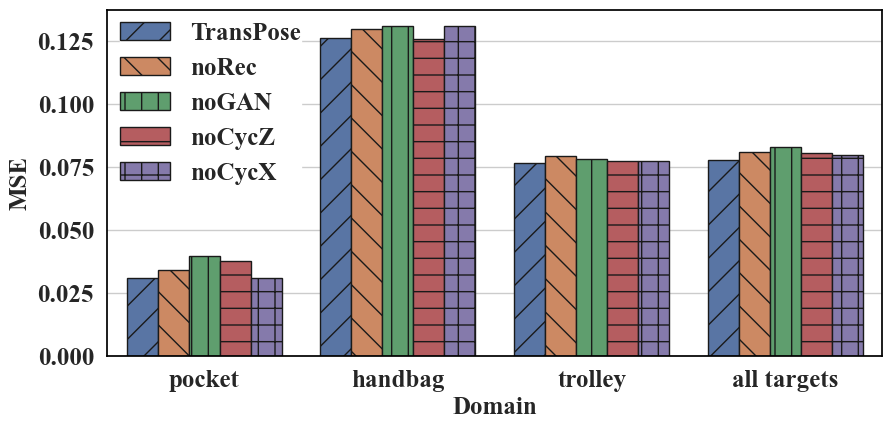

In [46]:
# base' 'flat' 'noAccMStd' 'noCycX' 'noCycZ' 'noDiff' 'noGAN' 'noRec' 'noStd' 'noYawDiff'
# Effect of Domain Std and AccMag

hue_order = ['base', 'noRec', 'noGAN', 'noCycZ', 'noCycX'] # , 'noAccMStd', 'noStd', 'noYawDiff'

g=plot_eval_domain(data, hue_order, 'Rho+Psi', 'MSE', loc='upper left')
# plot_eval_domain(data, hue_order, 'Psi', 'MSE of ρ')
# plot_eval_domain(data, hue_order, 'Rho', 'MSE of ψ')

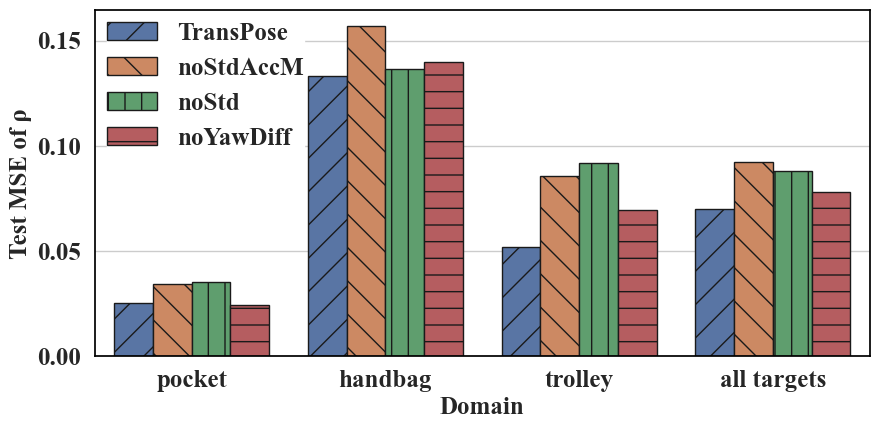

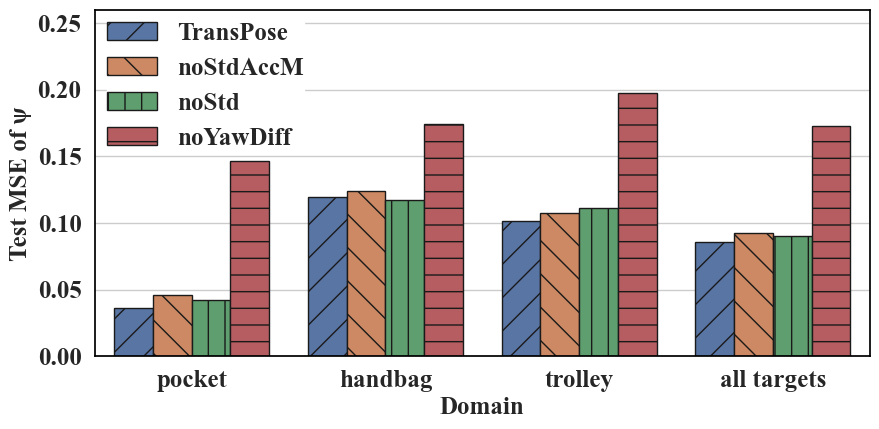

<AxesSubplot: xlabel='Domain', ylabel='Test MSE of ψ'>

In [49]:
hue_order = ['base', 'noAccMStd', 'noStd', 'noYawDiff'] # , 'noAccMStd', 'noStd', 'noYawDiff'

# plot_eval_domain(data, hue_order, 'Rho+Psi', 'Test MSE')
plot_eval_domain(data, hue_order, 'Rho', 'Test MSE of ρ', loc='upper left')
plot_eval_domain(data, hue_order, 'Psi', 'Test MSE of ψ', loc='upper left', ylim=(0, 0.26))

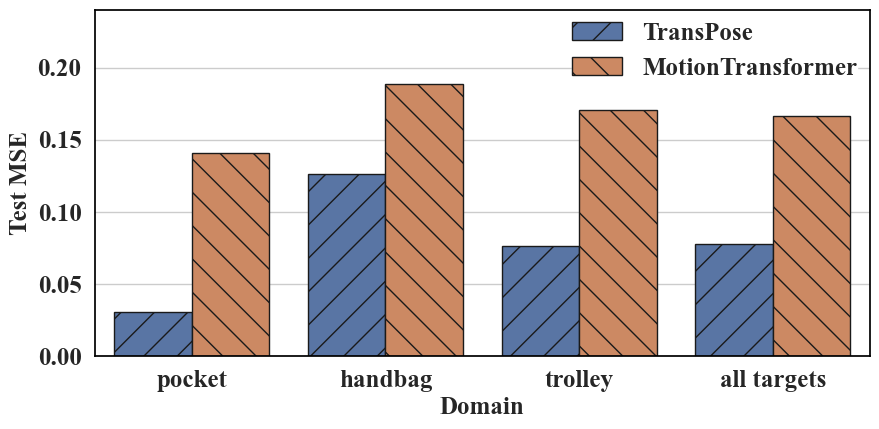

<AxesSubplot: xlabel='Domain', ylabel='Test MSE'>

In [58]:
hue_order = ['base', 'mtbase'] # , 'mtbase', 'noAccMStd', 'noStd', 'noYawDiff'

plot_eval_domain(data, hue_order, 'Rho+Psi', 'Test MSE', loc='upper right', ylim=(0, 0.24))
# plot_eval_domain(data, hue_order, 'Psi', 'Test MSE of ρ')
# plot_eval_domain(data, hue_order, 'Rho', 'Test MSE of ψ')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


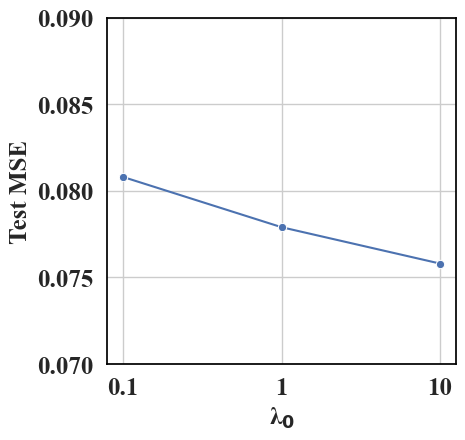

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


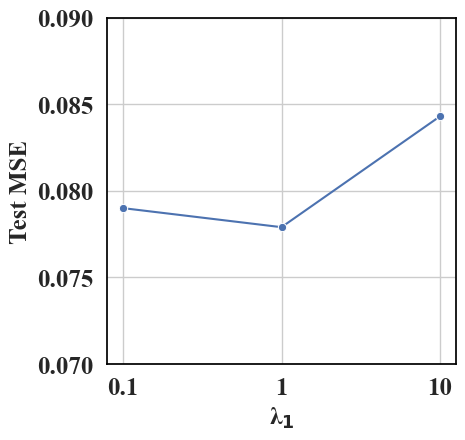

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


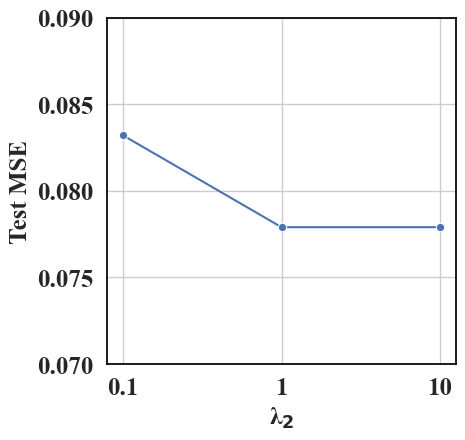

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


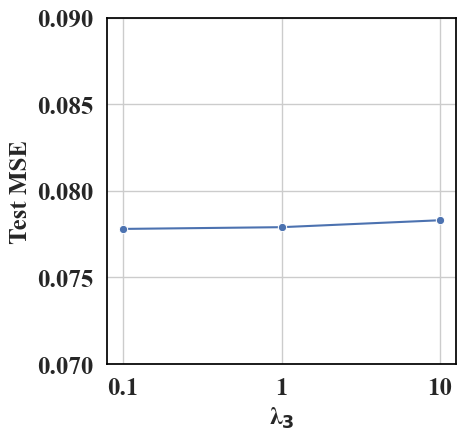

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


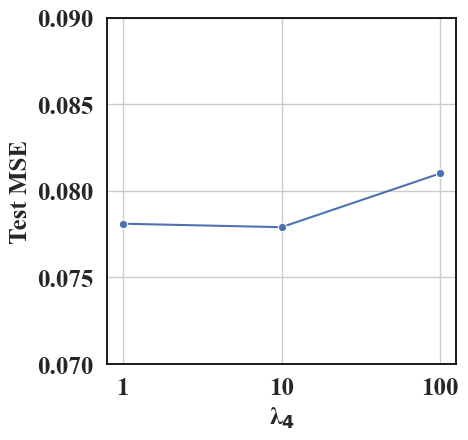

In [6]:
def plot_param(data, hue_order, var_order, xlabel, ylim=None):
    data = select_df(data_ori, 'method', hue_order)
    data = select_df(data, 'loss_type', 'Rho+Psi')
    data = data.melt(id_vars=['method', 'name', 'loss_type'], value_vars=['all targets'])
    data['var'] = data['method'].copy()
    data['var'].replace(dict(zip(hue_order, var_order)), inplace=True)
    data = sort_df(data, 'var', dict(zip(var_order, list(range(len(var_order))))))
    # print(data)

    sns.set_context({'figure.figsize':[4.5, 4.5]})
    g = sns.lineplot(data, x="var", y="value", marker='o', markers=True)
    set_g(g, 18, xlabel=xlabel, ylabel="Test MSE", ylim=ylim)
    plt.legend().remove()
    plt.show()

plot_param(data, ['a_ae/0.1', 'base','a_ae/10'], ['0.1', '1', '10'], 'λ$_0$', [0.07, 0.09])
plot_param(data, ['a_gan/0.1', 'base','a_gan/10'], ['0.1', '1', '10'], 'λ$_1$', [0.07, 0.09])
plot_param(data, ['a_cycz/0.1', 'base','a_cycz/10'], ['0.1', '1', '10'], 'λ$_2$', [0.07, 0.09])
plot_param(data, ['a_cycx/0.1', 'base','a_cycx/10'], ['0.1', '1', '10'], 'λ$_3$', [0.07, 0.09])
plot_param(data, ['a_pred/1', 'base','a_pred/100'], ['1', '10', '100'], 'λ$_4$', [0.07, 0.09])